# Assignment 3

Fundamentals of Machine Learning <br>
Master Data-Driven Design <br>
University of Applied Science Utrecht

## How Lineair Regression Works

With lineair regression you built a model using a independent variable ($x$) to predict a dependent variable ($y$). The model will try to find a lineair line among provided data points. Since we are talking about a lineair regression line, we can use the following equation: $y = b + mx$. In this equation is $b$ the intercept and $m$ the slope.

## Data Pre-Processing

In [1]:
# importing stuff
import math
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# loading data
data = pd.read_csv('data Mashable.csv')

In [3]:
# showing data
data.head(5)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


## Which Variables to Use in the Model

In [4]:
# show what variables we can work with
print(data.columns)

Index(['id', 'url', 'n_tokens_title', 'n_tokens_content', 'num_imgs',
       'num_videos', 'average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'shares',
       'shares_log'],
      dtype='object')


In [5]:
# show correlation matrix (only five highest rows) to see if some correlate heavily
# answer is no
data.corr().nlargest(5, ['n_tokens_title', 'n_tokens_content', 'num_imgs',
       'num_videos', 'average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'title_subjectivity', 'title_sentiment_polarity', 'shares', 'shares_log'])

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
title_subjectivity,-0.008384,0.075907,0.004364,0.056100,0.058613,-0.037501,-0.005399,0.045334,-0.040481,-0.013620,...,0.004438,0.002299,0.026287,0.021418,0.125244,0.026624,1.000000,0.238629,0.019736,0.055161
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
data_channel_is_world,0.000383,0.032430,0.049954,-0.106978,-0.084919,0.067396,-0.119563,-0.229642,-0.218833,-0.128047,...,0.020217,0.000368,-0.008691,-0.006276,-0.198923,-0.214410,-0.062078,-0.073449,-0.045618,-0.141932


In [6]:
# check if all articles are categorized
# answer is no: 3804 are not.
data['sum'] = data['data_channel_is_lifestyle'] + data['data_channel_is_entertainment'] + data['data_channel_is_bus'] + data['data_channel_is_socmed'] + data['data_channel_is_tech'] + data['data_channel_is_world']
data['sum'].value_counts()

1    21195
0     3804
Name: sum, dtype: int64

In [7]:
# show the correlations of all variables with shares_log
data[data.columns[1:]].corr()['shares_log'][:]

n_tokens_title                  -0.012247
n_tokens_content                 0.032897
num_imgs                         0.085575
num_videos                       0.037147
average_token_length            -0.031730
data_channel_is_lifestyle        0.036926
data_channel_is_entertainment   -0.080967
data_channel_is_bus             -0.033469
data_channel_is_socmed           0.085516
data_channel_is_tech             0.047729
data_channel_is_world           -0.141932
weekday_is_monday               -0.007843
weekday_is_tuesday              -0.027738
weekday_is_wednesday            -0.032125
weekday_is_thursday             -0.030329
weekday_is_friday                0.006309
weekday_is_saturday              0.072644
weekday_is_sunday                0.071864
is_weekend                       0.105919
global_subjectivity              0.093021
global_sentiment_polarity        0.053199
title_subjectivity               0.055161
title_sentiment_polarity         0.050216
shares                           0

From this list of variables, the following have been chosen to be fitted into the model:
* Weekend
    * Whether the article was posted on a weekend day has the highest correlation with with shares_log.
    * Therefore this variable was used in the model.
    * Which specific day has a lesser influence.
* Kind of channel
    * data_channel_is_world has after is_weekend the highest correlation with shares_log.
    * Since this variable is part of a series of dummies, all dummies are included.
    * There are 3804 articles that are not classied in one of the 6 categories and therefore they are all used.
* Global subjectivity
    * After kind of channel, global subjectivity has the highest correlation.
* Number of images
    * After global subjectivity, number of images has the highest correlation.
* Title subjectivity
    * After number of images, title subjectivity has the highest correlation.
    
Number of shares has not been chosen since shares_log has been derived from this variable.

In [8]:
# select these variables
x_data = data[['is_weekend', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 
               'data_channel_is_bus','data_channel_is_socmed', 'data_channel_is_tech', 
               'data_channel_is_world', 'global_subjectivity', 'num_imgs', 'title_subjectivity']]

In [9]:
# get all the values of the independent and dependent variables
x = x_data.values
y = data['shares_log'].values

## Split the Dataset

Use 70% of the data for the training dataset and 30% for the testing dataset.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Train the model

In [11]:
# make the model and train the model
lm = LinearRegression()  
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# make a dataframe with a coefficient for each variable
coeff_df = pd.DataFrame(lm.coef_, x_data.columns, columns=['coefficient'])  
coeff_df

,coefficient
is_weekend,0.118794
data_channel_is_lifestyle,-0.063844
data_channel_is_entertainment,-0.201860
data_channel_is_bus,-0.139517
data_channel_is_socmed,0.005019
data_channel_is_tech,-0.084932
data_channel_is_world,-0.229058
global_subjectivity,0.154307
num_imgs,0.002605
title_subjectivity,0.029093


In [13]:
# fit the model
lm.fit(x, y)

# get the intercept
b0 = lm.intercept_

# get the coefficient
b1 = lm.coef_[0]

print(f"y = {b0:.2f} + {b1:.2f}x")

y = 3.26 + 0.11x


This means our lineair regression line can be formulated as follows: $y = 3.33 + 0.11x$

## Evaluating the Model 

In [14]:
# make predictions
y_pred = lm.predict(x_test)

In [15]:
# compare the prediction to the actual value
pred_data = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
pred_data.head(5)

,actual,predicted
0,3.556303,3.407664
1,3.113943,3.372029
2,3.278754,3.282522
3,3.623249,3.396631
4,3.838849,3.283757


### R<sup>2</sup>

In [16]:
metrics.r2_score(y_test, y_pred)

0.06318884217384191

The R<sup>2</sup> rounded to two digits is 0.06. This means that only 6% of the variation in amount of shares (shares_log) is explained by the lineair regression model. Since this number is quite low, we can conclude that the model is not very accurate.

### RMSE

In [17]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.392993928991207

The root mean squared error, or RMSE for short, is 0.39 (rounded to two digits). This means that the model is typically 0.39 off with predicting the shares (shares_log).

### Plot of the Model

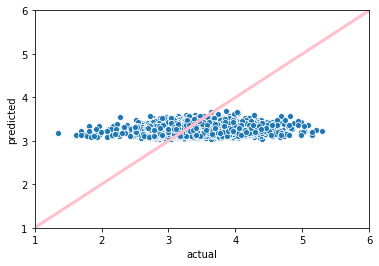

In [18]:
# make a scatterplot with the lineair regression line of the model
sns.scatterplot(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.xlim([1, 6])
plt.ylim([1, 6])
plt.plot([1, 6], [1, 6], color='pink', lw = 3)
plt.show()

As you can see, the line does not fit the data very well.

### Investigating the Residuals

In [19]:
# get the residual
resid = y_pred - y_test

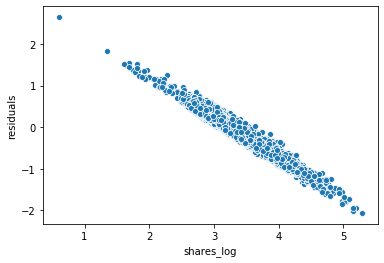

In [20]:
# plot them
sns.scatterplot(x = y_test, y = resid, data = pred_data)
plt.xlabel('shares_log')
plt.ylabel('residuals')
plt.show()

As you can see in the plot above, the model has to correct for the data quite a lot.